# Plot data from previously saved models 

In [4]:
using Serialization
using CSV
using DataFrames
using Plots

include("structs.jl")
include("utils.jl")

compute_metrics (generic function with 1 method)

Cost: 53.09209132762124
Av ser: 3.3466666666666667
Av blr: 0.12436356165238645
nd_os


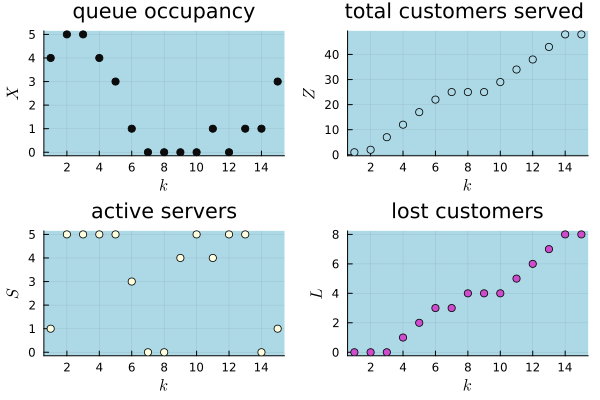

Cost: 41.08961776075092
Av ser: 11.393333333333333
Av blr: 0.09322959995743287
d_os


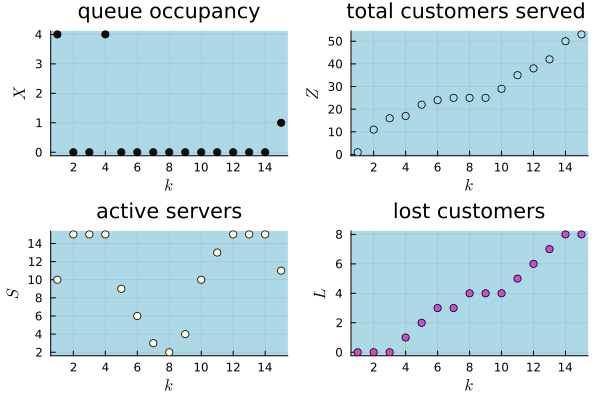

Cost: 139.21467980579817
Av ser: 4.366666666666666
Av blr: 0.33712003284782877
nd_os


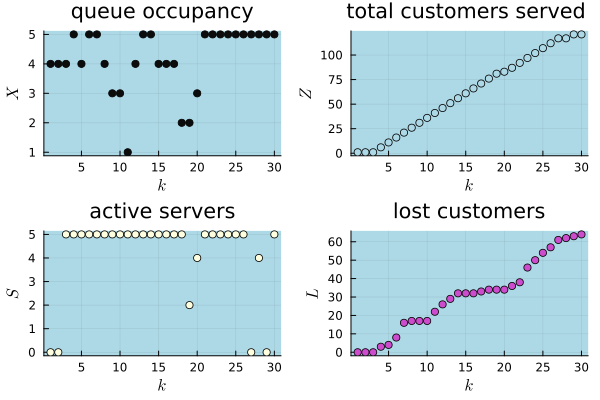

Cost: 119.52943064342642
Av ser: 14.33
Av blr: 0.2868819099418994
d_os


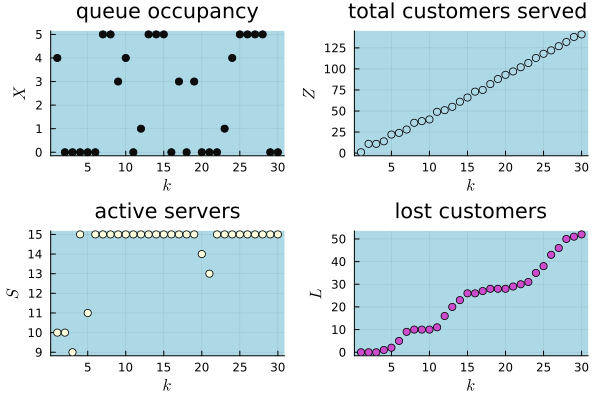

Cost: 183.9256505612135
Av ser: 5.0
Av blr: 0.44731412640303375
d_os


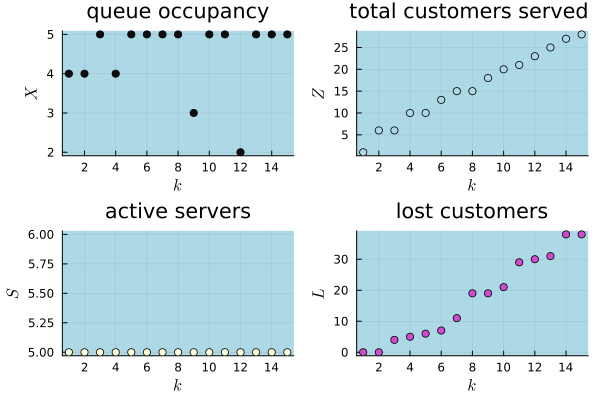

Cost: 47.673013084272206
Av ser: 10.626666666666667
Av blr: 0.09261586604401385
d_os


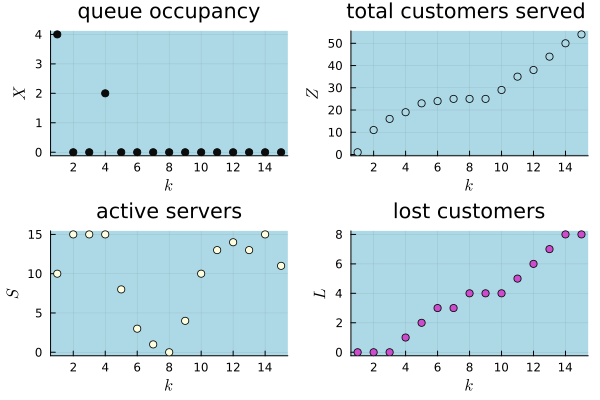

Cost: 57.80071415320007
Av ser: 4.086666666666667
Av blr: 0.1342851187163335
nd_os


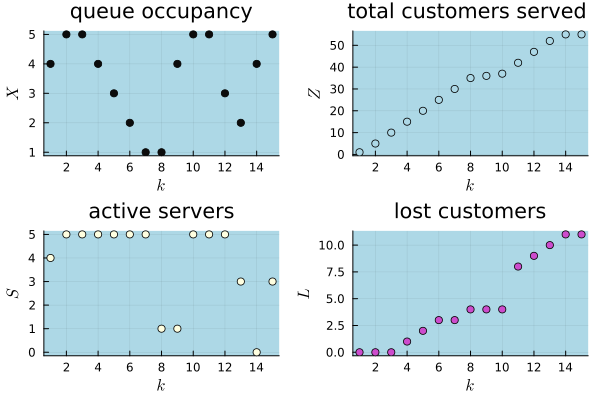

Cost: 151.08126348904065
Av ser: 5.0
Av blr: 0.3652031587226016
d_os


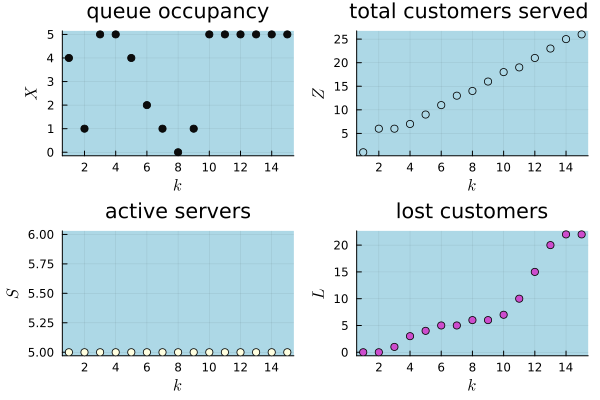

In [9]:
id_list = readdir("results/")
# id_list = ["cuoasrvwys.txt", "xuzaahusin.txt", "pulytlwhjy.txt", "dckigensnh.txt"]

df = CSV.read("results.csv", DataFrame)

for filename in id_list
    model_dict = deserialize("results//"*filename)
    a_mat = model_dict["a"]
    d_mat = model_dict["d"]
    res = model_dict["res"]

    result_id = splitext(filename)[1]
    metrics = filter(:result_id => ==(result_id), df)

    println("Cost: ", metrics[!, "cost"][1])
    println("Av ser: ", metrics[!, "av_ser"][1])
    println("Av blr: ", metrics[!, "av_blr"][1])

    plot_results(res, metrics[!, "horiz"][1], 1)
end

